LABELS

Experts Description of the Classification:

The HAM10000 Dataset: A Large Collection of Multi-Source Dermatoscopic Images of Common Pigmented Skin Lesions
https://arxiv.org/abs/1803.10417

1. nv:

 Are benign neoplasms of melanocytes and appear in a myriad of variants, which all are included in our series. The variants may differ significantly from a dermatoscopic point of view.
[6705 images]

2. mel:

Melanoma is a malignant neoplasm derived from melanocytes that may appear in different variants. If excised in an early stage it can be cured by simple surgical excision. Melanomas can be invasive or non-invasive (in situ). We included all variants of melanoma including melanoma in situ, but did exclude non-pigmented, subungual, ocular or mucosal melanoma.
[1113 images]

3. bkl:

"Benign keratosis" is a generic class that includes seborrheic ker- atoses ("senile wart"), solar lentigo - which can be regarded a flat variant of seborrheic keratosis - and lichen-planus like keratoses (LPLK), which corresponds to a seborrheic keratosis or a solar lentigo with inflammation and regression [22]. The three subgroups may look different dermatoscop- ically, but we grouped them together because they are similar biologically and often reported under the same generic term histopathologically. From a dermatoscopic view, lichen planus-like keratoses are especially challeng- ing because they can show morphologic features mimicking melanoma [23] and are often biopsied or excised for diagnostic reasons.
[1099 images]

4. bcc:

Basal cell carcinoma is a common variant of epithelial skin cancer that rarely metastasizes but grows destructively if untreated. It appears in different morphologic variants (flat, nodular, pigmented, cystic, etc) [21], which are all included in this set.
[514 images]

5. akiec:

Actinic Keratoses (Solar Keratoses) and intraepithelial Carcinoma (Bowen’s disease) are common non-invasive, variants of squamous cell car- cinoma that can be treated locally without surgery. Some authors regard them as precursors of squamous cell carcinomas and not as actual carci- nomas. There is, however, agreement that these lesions may progress to invasive squamous cell carcinoma - which is usually not pigmented. Both neoplasms commonly show surface scaling and commonly are devoid of pigment. Actinic keratoses are more common on the face and Bowen’s disease is more common on other body sites. Because both types are in- duced by UV-light the surrounding skin is usually typified by severe sun damaged except in cases of Bowen’s disease that are caused by human papilloma virus infection and not by UV. Pigmented variants exists for Bowen’s disease [19] and for actinic keratoses [20]. Both are included in this set.
[327 images]

6. vasc:

Vascular skin lesions in the dataset range from cherry angiomas to angiokeratomas [25] and pyogenic granulomas [26]. Hemorrhage is also included in this category.
[142 images]

7. df:

Dermatofibroma is a benign skin lesion regarded as either a benign proliferation or an inflammatory reaction to minimal trauma. It is brown often showing a central zone of fibrosis dermatoscopically [24].
[115 images]


[Total images = 10015]

Importing the libraries for the Classification and Deep Learning

In [1]:
import pandas as pd
import numpy as np
#import keras
#from keras import backend as K

import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

import os

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import itertools
import shutil
import matplotlib.pyplot as plt
%matplotlib inline


Loading the HAM10000 directory

In [2]:
inp = '/Users/aqdus/desktop/Skin'
os.listdir(inp)


['hmnist_28_28_L.csv',
 '.DS_Store',
 'hmnist_28_28_RGB.csv',
 'HAM10000_images_part_1',
 'hmnist_8_8_RGB.csv',
 'hmnist_8_8_L.csv',
 'HAM10000_images_part_2',
 'HAM10000_metadata.csv']

Creating a new Directory to split the images into classes directories from the original images dataset of HAM10000 into train and validation directories.

In [3]:
# Create a new directory
base_dir = '/Users/aqdus/desktop/Skin/Skin_Cancer'
os.mkdir(base_dir)


#[CREATE FOLDERS INSIDE THE BASE DIRECTORY]

# now we create 7 folders inside 'base_dir':

# train_dir
# nv
# mel
# bkl
# bcc
# akiec
# vasc
# df

# val_dir
# nv
# mel
# bkl
# bcc
# akiec
# vasc
# df

# create a path to 'base_dir' to which we will join the names of the new folders
# train_dir
train_dir = os.path.join(base_dir, 'train_dir')
os.mkdir(train_dir)

# val_dir
val_dir = os.path.join(base_dir, 'val_dir')
os.mkdir(val_dir)


# [CREATE FOLDERS INSIDE THE TRAIN, VALIDATION AND TEST FOLDERS]
# Inside each folder we create seperate folders for each class

# create new folders inside train_dir
nv = os.path.join(train_dir, 'nv')
os.mkdir(nv)
mel = os.path.join(train_dir, 'mel')
os.mkdir(mel)
bkl = os.path.join(train_dir, 'bkl')
os.mkdir(bkl)
bcc = os.path.join(train_dir, 'bcc')
os.mkdir(bcc)
akiec = os.path.join(train_dir, 'akiec')
os.mkdir(akiec)
vasc = os.path.join(train_dir, 'vasc')
os.mkdir(vasc)
df = os.path.join(train_dir, 'df')
os.mkdir(df)


# create new folders inside val_dir
nv = os.path.join(val_dir, 'nv')
os.mkdir(nv)
mel = os.path.join(val_dir, 'mel')
os.mkdir(mel)
bkl = os.path.join(val_dir, 'bkl')
os.mkdir(bkl)
bcc = os.path.join(val_dir, 'bcc')
os.mkdir(bcc)
akiec = os.path.join(val_dir, 'akiec')
os.mkdir(akiec)
vasc = os.path.join(val_dir, 'vasc')
os.mkdir(vasc)
df = os.path.join(val_dir, 'df')
os.mkdir(df)


Create train and val sets

In [5]:
df_data = pd.read_csv(inp+'/HAM10000_metadata.csv')

df_data.head()


,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


Create a stratified val set

In [6]:
# this will tell us how many images are associated with each lesion_id
df = df_data.groupby('lesion_id').count()

# now we filter out lesion_id's that have only one image associated with it
df = df[df['image_id'] == 1]

df.reset_index(inplace=True)

df.head()


,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000001,1,1,1,1,1,1
1,HAM_0000003,1,1,1,1,1,1
2,HAM_0000004,1,1,1,1,1,1
3,HAM_0000007,1,1,1,1,1,1
4,HAM_0000008,1,1,1,1,1,1


In [7]:
# here we identify lesion_id's that have duplicate images and those that have only
# one image.

def identify_duplicates(x):

    unique_list = list(df['lesion_id'])

    if x in unique_list:
        return 'no_duplicates'
    else:
        return 'has_duplicates'


# create a new colum that is a copy of the lesion_id column
df_data['duplicates'] = df_data['lesion_id']
# apply the function to this new column
df_data['duplicates'] = df_data['duplicates'].apply(identify_duplicates)

df_data.head()


,lesion_id,image_id,dx,dx_type,age,sex,localization,duplicates
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,has_duplicates
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,has_duplicates
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,has_duplicates
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,has_duplicates
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,has_duplicates


In [8]:
df_data['duplicates'].value_counts() #calculating the count of the duplicates


no_duplicates     5514
has_duplicates    4501
Name: duplicates, dtype: int64

In [9]:
# now we filter out images that don't have duplicates
df = df_data[df_data['duplicates'] == 'no_duplicates']

df.shape


(5514, 8)

In [10]:
# now we create a val set using df because we are sure that none of these images
# have augmented duplicates in the train set
y = df['dx']

_, df_val = train_test_split(df, test_size=0.17, random_state=101, stratify=y)

df_val.shape


(938, 8)

Create a train set that excludes images that are in the val set

In [12]:
# This set will be df_data excluding all rows that are in the val set

# This function identifies if an image is part of the train
# or val set.
def identify_val_rows(x):
    # create a list of all the lesion_id's in the val set
    val_list = list(df_val['image_id'])

    if str(x) in val_list:
        return 'val'
    else:
        return 'train'

# identify train and val rows


# create a new colum that is a copy of the image_id column
df_data['train_or_val'] = df_data['image_id']
# apply the function to this new column
df_data['train_or_val'] = df_data['train_or_val'].apply(identify_val_rows)

# filter out train rows
df_train = df_data[df_data['train_or_val'] == 'train']


print(len(df_train))
print(len(df_val))


9077
938


In [13]:
df_train['dx'].value_counts() #count of images in each classes in the train directory


nv       5954
mel      1074
bkl      1024
bcc       484
akiec     301
vasc      131
df        109
Name: dx, dtype: int64

In [14]:
df_val['dx'].value_counts() #count of images in each classes in the validation directory


nv       751
bkl       75
mel       39
bcc       30
akiec     26
vasc      11
df         6
Name: dx, dtype: int64

In [15]:
# Set the image_id as the index in df_data
df_data.set_index('image_id', inplace=True)


In [16]:
base_dir = '/Users/aqdus/desktop/Skin/Skin_Cancer'

train_dir = os.path.join(base_dir, 'train_dir')

val_dir = os.path.join(base_dir, 'val_dir')


Transferring the images into their respective class folders based on the csv file from the original folder.

In [17]:
# Get a list of images in each of the two folders
folder_1 = os.listdir(inp+'/ham10000_images_part_1')
folder_2 = os.listdir(inp+'/ham10000_images_part_2')

# Get a list of train and val images
train_list = list(df_train['image_id'])
val_list = list(df_val['image_id'])


# Transfer the train images

for image in train_list:

    fname = image + '.jpg'
    label = df_data.loc[image, 'dx']

    if fname in folder_1:
        # source path to image
        src = os.path.join(inp+'/ham10000_images_part_1', fname)
        # destination path to image
        dst = os.path.join(train_dir, label, fname)
        # copy the image from the source to the destination
        shutil.copyfile(src, dst)

    if fname in folder_2:
        # source path to image
        src = os.path.join(inp+'/ham10000_images_part_2', fname)
        # destination path to image
        dst = os.path.join(train_dir, label, fname)
        # copy the image from the source to the destination
        shutil.copyfile(src, dst)


# Transfer the val images

for image in val_list:

    fname = image + '.jpg'
    label = df_data.loc[image, 'dx']

    if fname in folder_1:
        # source path to image
        src = os.path.join(inp+'/ham10000_images_part_1', fname)
        # destination path to image
        dst = os.path.join(val_dir, label, fname)
        # copy the image from the source to the destination
        shutil.copyfile(src, dst)

    if fname in folder_2:
        # source path to image
        src = os.path.join(inp+'/ham10000_images_part_2', fname)
        # destination path to image
        dst = os.path.join(val_dir, label, fname)
        # copy the image from the source to the destination
        shutil.copyfile(src, dst)


In [19]:
# check how many train images we have in each folder

print(len(os.listdir('/Users/aqdus/desktop/Skin/Skin_Cancer/train_dir/nv')))
print(len(os.listdir('/Users/aqdus/desktop/Skin/Skin_Cancer/train_dir/mel')))
print(len(os.listdir('/Users/aqdus/desktop/Skin/Skin_Cancer/train_dir/bkl')))
print(len(os.listdir('/Users/aqdus/desktop/Skin/Skin_Cancer/train_dir/bcc')))
print(len(os.listdir('/Users/aqdus/desktop/Skin/Skin_Cancer/train_dir/akiec')))
print(len(os.listdir('/Users/aqdus/desktop/Skin/Skin_Cancer/train_dir/vasc')))
print(len(os.listdir('/Users/aqdus/desktop/Skin/Skin_Cancer/train_dir/df')))


5954
1074
1024
484
301
131
109


In [20]:
# check how many val images we have in each folder

print(len(os.listdir('/Users/aqdus/desktop/Skin/Skin_Cancer/val_dir/nv')))
print(len(os.listdir('/Users/aqdus/desktop/Skin/Skin_Cancer/val_dir/mel')))
print(len(os.listdir('/Users/aqdus/desktop/Skin/Skin_Cancer/val_dir/bkl')))
print(len(os.listdir('/Users/aqdus/desktop/Skin/Skin_Cancer/val_dir/bcc')))
print(len(os.listdir('/Users/aqdus/desktop/Skin/Skin_Cancer/val_dir/akiec')))
print(len(os.listdir('/Users/aqdus/desktop/Skin/Skin_Cancer/val_dir/vasc')))
print(len(os.listdir('/Users/aqdus/desktop/Skin/Skin_Cancer/val_dir/df')))


751
39
75
30
26
11
6


Performing Image Augmentation for the train images to increase the dataset in size for training and thus result in better accuracy

In [24]:
# note that we are not augmenting class 'nv'
class_list = ['bkl', 'bcc', 'akiec', 'vasc', 'df']

for item in class_list:

    # We are creating temporary directories here because we delete these directories later
    # create a base dir
    aug_dir = '/Users/aqdus/desktop/Skin/temp'
    os.mkdir(aug_dir)
    # create a dir within the base dir to store images of the same class
    img_dir = os.path.join(aug_dir, 'img_dir')
    os.mkdir(img_dir)

    # Choose a class
    img_class = item

    # list all images in that directory
    img_list = os.listdir('/Users/aqdus/desktop/Skin/Skin_Cancer/train_dir/' + img_class)

    # Copy images from the class train dir to the img_dir e.g. class 'mel'
    for fname in img_list:
        # source path to image
        src = os.path.join('/Users/aqdus/desktop/Skin/Skin_Cancer/train_dir/' + img_class, fname)
        # destination path to image
        dst = os.path.join(img_dir, fname)
        # copy the image from the source to the destination
        shutil.copyfile(src, dst)

    # point to a dir containing the images and not to the images themselves
    path = aug_dir
    save_path = '/Users/aqdus/desktop/Skin/Skin_Cancer/train_dir/' + img_class

    # Create a data generator
    datagen = ImageDataGenerator(
        rotation_range=180,
        width_shift_range=0.1,
        height_shift_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True,
        vertical_flip=True,
        #brightness_range=(0.9,1.1),
        fill_mode='nearest')

    batch_size = 50

    aug_datagen = datagen.flow_from_directory(path,
                                              save_to_dir=save_path,
                                              save_format='jpg',
                                              target_size=(224, 224),
                                              batch_size=batch_size)

    # Generate the augmented images and add them to the training folders

    ###########

    num_aug_images_wanted = 6000  # total number of images we want to have in each class

    ###########

    num_files = len(os.listdir(img_dir))
    num_batches = int(np.ceil((num_aug_images_wanted-num_files)/batch_size))

    # run the generator and create about 6000 augmented images
    for i in range(0, num_batches):

        imgs, labels = next(aug_datagen)

    # delete temporary directory with the raw image files
    shutil.rmtree(aug_dir)


Found 1024 images belonging to 1 classes.
Found 484 images belonging to 1 classes.
Found 301 images belonging to 1 classes.
Found 131 images belonging to 1 classes.
Found 109 images belonging to 1 classes.


In [25]:
# Check how many train images we now have in each folder.
# This is the original images plus the augmented images.

print(len(os.listdir('/Users/aqdus/desktop/Skin/Skin_Cancer/train_dir/nv')))
print(len(os.listdir('/Users/aqdus/desktop/Skin/Skin_Cancer/train_dir/mel')))
print(len(os.listdir('/Users/aqdus/desktop/Skin/Skin_Cancer/train_dir/bkl')))
print(len(os.listdir('/Users/aqdus/desktop/Skin/Skin_Cancer/train_dir/bcc')))
print(len(os.listdir('/Users/aqdus/desktop/Skin/Skin_Cancer/train_dir/akiec')))
print(len(os.listdir('/Users/aqdus/desktop/Skin/Skin_Cancer/train_dir/vasc')))
print(len(os.listdir('/Users/aqdus/desktop/Skin/Skin_Cancer/train_dir/df')))


5954
5920
5920
5858
5217
5289
4410


Creating the Mobile Net Model

In [26]:
train_path = '/Users/aqdus/desktop/Skin/Skin_Cancer/train_dir'
valid_path = '/Users/aqdus/desktop/Skin/Skin_Cancer/val_dir'

num_train_samples = len(df_train) #counting the samples of train
num_val_samples = len(df_val)#counting the samples of val
#setting the batch size
train_batch_size = 10
val_batch_size = 10
image_size = 224

#creating the train and validation steps
train_steps = np.ceil(num_train_samples / train_batch_size) 
val_steps = np.ceil(num_val_samples / val_batch_size)


In [27]:
#preprocessing the train and validation data
datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet.preprocess_input)

train_batches = datagen.flow_from_directory(train_path,
                                            target_size=(
                                                image_size, image_size),
                                            batch_size=train_batch_size)

valid_batches = datagen.flow_from_directory(valid_path,
                                            target_size=(
                                                image_size, image_size),
                                            batch_size=val_batch_size)

# Note: shuffle=False causes the test dataset to not be shuffled
test_batches = datagen.flow_from_directory(valid_path,
                                           target_size=(
                                               image_size, image_size),
                                           batch_size=1,
                                           shuffle=False)


Found 38568 images belonging to 7 classes.
Found 938 images belonging to 7 classes.
Found 938 images belonging to 7 classes.


In [28]:
# create a copy of a mobilenet model

mobile = tf.keras.applications.mobilenet.MobileNet()


Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2022-04-10 13:45:42.758380: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-04-10 13:45:42.759256: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


17235968/17225924 [==============================] - 0s 0us/step


In [29]:
#importing the tensorflow keras libraries for the model creation
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint


Creating the Model Architecture.

In [30]:
# CREATE THE MODEL ARCHITECTURE

# Exclude the last 5 layers of the above model.
# This will include all layers up to and including global_average_pooling2d_1
x = mobile.layers[-6].output

# Create a new dense layer for predictions
# Flatten the output layer to 1 dimension
x = Flatten()(x)
# # Create a new dense layer for predictions
x = Dense(1024, activation='relu')(x)
# 7 corresponds to the number of classes
x = Dropout(0.25)(x)
predictions = Dense(7, activation='softmax')(x)

# inputs=mobile.input selects the input layer, outputs=predictions refers to the
# dense layer we created above.

model = Model(inputs=mobile.input, outputs=predictions)


In [31]:
# We need to choose how many layers we actually want to be trained.

# Here we are freezing the weights of all layers except the
# last 23 layers in the new model.
# The last 23 layers of the model will be trained.

for layer in model.layers[:-23]:
    layer.trainable = False


In [41]:
model.compile(Adam(learning_rate=0.01), loss='categorical_crossentropy',
              metrics=['accuracy'])
#compiling the model

In [34]:
# Get the labels that are associated with each index
print(valid_batches.class_indices)


{'akiec': 0, 'bcc': 1, 'bkl': 2, 'df': 3, 'mel': 4, 'nv': 5, 'vasc': 6}


In [42]:
# Add weights to try to make the model more sensitive to melanoma

class_weights = {
    0: 1.0,  # akiec
    1: 1.0,  # bcc
    2: 1.0,  # bkl
    3: 1.0,  # df
    4: 3.0,  # mel # Try to make the model more sensitive to Melanoma.
    5: 1.0,  # nv
    6: 1.0,  # vasc
}


In [43]:
filepath = "/Users/aqdus/desktop/Skin/model.h5" #destination to save our model
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1,
                             save_best_only=True, mode='min')  #adding our checkpoint to save the model at the best epoch.
                            


reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2,
                              verbose=1, mode='min', min_lr=0.00001)  #Reduce learning rate when metric has stopped improving


callbacks_list = [checkpoint, reduce_lr]

#fitting our model.
history = model.fit(train_batches, steps_per_epoch=train_steps,
                              class_weight=class_weights,
                              validation_data=valid_batches,
                              validation_steps=val_steps,
                              epochs=20, verbose=1,
                              callbacks=callbacks_list)


Epoch 1/20


2022-04-10 14:56:17.621236: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


908/908 [==============================] - ETA: 0s - loss: 0.6175 - accuracy: 0.8230

2022-04-10 14:57:02.359987: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


908/908 [==============================] - 51s 55ms/step - loss: 0.6175 - accuracy: 0.8230 - val_loss: 0.4541 - val_accuracy: 0.8507

Epoch 00001: val_loss improved from inf to 0.45409, saving model to /Users/aqdus/desktop/Skin/model.h5
Epoch 2/20
908/908 [==============================] - 50s 55ms/step - loss: 0.5983 - accuracy: 0.8250 - val_loss: 0.4588 - val_accuracy: 0.8561

Epoch 00002: val_loss did not improve from 0.45409
Epoch 3/20
908/908 [==============================] - 50s 55ms/step - loss: 0.5574 - accuracy: 0.8365 - val_loss: 0.3594 - val_accuracy: 0.8881

Epoch 00003: val_loss improved from 0.45409 to 0.35938, saving model to /Users/aqdus/desktop/Skin/model.h5
Epoch 4/20
908/908 [==============================] - 50s 55ms/step - loss: 0.5157 - accuracy: 0.8521 - val_loss: 0.4114 - val_accuracy: 0.8763

Epoch 00004: val_loss did not improve from 0.35938
Epoch 5/20
908/908 [==============================] - 49s 54ms/step - loss: 0.5149 - accuracy: 0.8529 - val_loss: 0.436

Generating the validation and train scores

In [44]:
print("Train score:", model.evaluate(train_batches))
print("Test score:", model.evaluate(valid_batches))
n_epochs = len(history.history['loss'])


3857/3857 [==============================] - 144s 37ms/step - loss: 0.1258 - accuracy: 0.9537
Train score: [0.12580430507659912, 0.9536662697792053]
94/94 [==============================] - 6s 63ms/step - loss: 0.3520 - accuracy: 0.8977
Test score: [0.3520365059375763, 0.8976545929908752]


Plotting the training and validation accuracy and loss curves

In [45]:
def plotLearningCurve(history, epochs):  #function defining the generation of loss and accuracy curve for validation and test data.
  epochRange = range(1, epochs+1)
  fig, ax = plt.subplots(1, 2, figsize=(20, 10))
  ax[0].plot(epochRange, history.history['accuracy'],
             'b', label='Training Accuracy')
  ax[0].plot(epochRange, history.history['val_accuracy'],
             'r', label='Validation Accuracy')
  ax[0].set_title('Training and Validation accuracy')
  ax[0].set_xlabel('Epoch', fontsize=20)
  ax[0].set_ylabel('Accuracy', fontsize=20)
  ax[0].legend()
  ax[0].grid(color='gray', linestyle='--')
  ax[1].plot(epochRange, history.history['loss'], 'b', label='Training Loss')
  ax[1].plot(epochRange, history.history['val_loss'],
             'r', label='Validation Loss')
  ax[1].set_title('Training and Validation loss')
  ax[1].set_xlabel('Epoch', fontsize=20)
  ax[1].set_ylabel('Loss', fontsize=20)
  ax[1].legend()
  ax[1].grid(color='gray', linestyle='--')
  plt.show()


Plotting the accuracy and loss curves

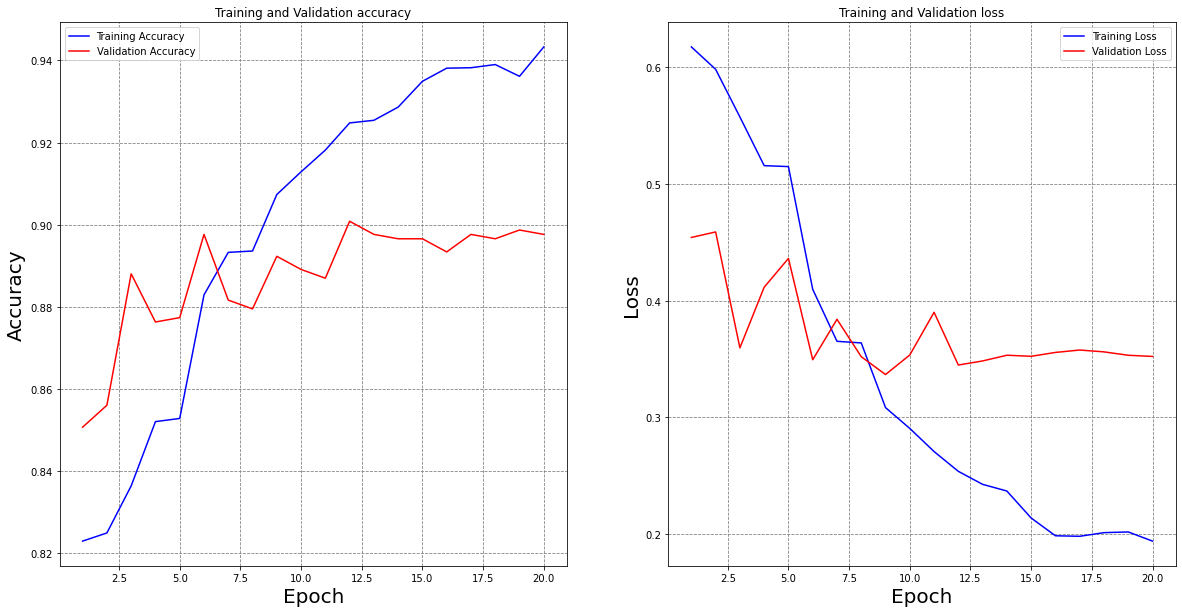

In [46]:
plotLearningCurve(history, n_epochs)


We notice that the model has performed well in terms of validation and training accuracy and loss.